## Modelo de aprendizaje automatico

Se busca predecir con este modelo valores futuros de fecha de modificación (ModifiedDate).
El modelo se compondrá en predicción de una regresión.

### Carga y exploración de los datos

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Carga de datos
df = pd.read_csv('datos.csv')
df.head()

,CompanyName,SalesPerson,Fecha
0,A Bike Store,adventure-works\pamela0,31
1,Progressive Sports,adventure-works\david8,396
2,Advanced Bike Components,adventure-works\jillian0,62
3,Modular Cycle Systems,adventure-works\jillian0,365
4,Metropolitan Sports Supply,adventure-works\shu0,427


### Modelo y entrenamiento

In [5]:
# 2. Definir X (predictoras) e y (objetivo)
X = df[['CompanyName', 'SalesPerson']]
y = df['Fecha']

# 3. División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

# 4. Preprocesamiento: One-Hot Encoding para ambas columnas categóricas
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'),
     ['CompanyName', 'SalesPerson'])
])

# 5. Construcción del pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

# 6. Entrenamiento
pipeline.fit(X_train, y_train)

# 7. Predicción y evaluación
y_pred = pipeline.predict(X_test)
mae  = mean_absolute_error(y_test, y_pred)

print(f"MAE:  {mae:.2f} días")
#print(f"RMSE: {rmse:.2f} días")


MAE:  172.83 días


R^2: 0.437


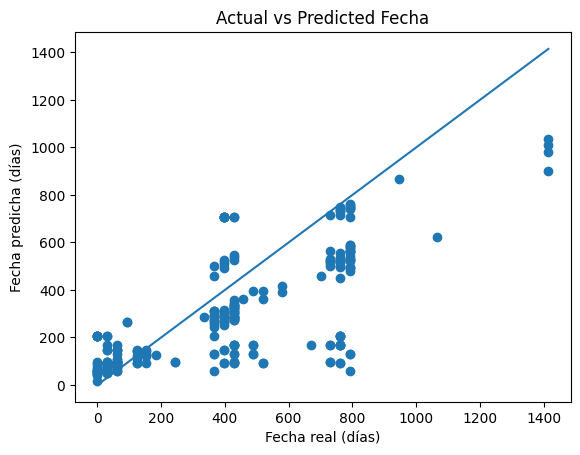

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Asumiendo que ya tienes X_test, y_test y el pipeline entrenado
y_pred = pipeline.predict(X_test)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.3f}")

# Gráfica: valores reales vs valores predichos
plt.figure()
plt.scatter(y_test, y_pred)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.xlabel('Fecha real (días)')
plt.ylabel('Fecha predicha (días)')
plt.title('Actual vs Predicted Fecha')
plt.show()


### Almacenamiento del modelo

In [9]:
import pickle

# 1. Guardar el pipeline en 'modelo.pkl'
with open('modelo.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

# 2. (Más adelante) Cargar el pipeline
with open('modelo.pkl', 'rb') as f:
    pipeline_cargado = pickle.load(f)
